# Decision Trees in Python (1/25)

*We depart from the schedule in the course syllabus for this session, in order to debrief lab 1 and give an additional tutorial to bring everyone up to speed on analyzing decision trees in Python. We will cover probability distributions next session (1/30), and catch up to the schedule on 2/1 by combining a discussion on simulation modeling with an overview of stochastic models of demand.*

**Learning Objectives:**

-	Write Python code to analyze a decision tree. (Analyze and Code)
-	Use online search and Python help to learn about unfamiliar commands and resolve unexpected IT issues. (Code)
-	Interpret graphs describing probability distributions: CDF, PDF, PMF. (Analyze)

## Video Tutorials

- Basic tutorial on building decision trees in Python and sensitivity analysis: https://www.screencast.com/t/vSuQvCWE4jJA
- (Optional) Behind the scene explanation of what goes on in the `decisiontrees.py` module: https://www.screencast.com/t/2YLkhrXmu


## Example

Below is an example of building a decision tree using the `decisiontrees.py` module. See the comments below (following `#` signs) for an explanation of each line. 

5700.0


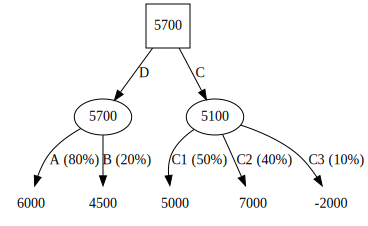

E, DECISION node with value 5700.00
--> Option 1: D, EVENT node with value 5700.00 (Optimal decision for node E)
    --> w.p. 0.80: A, VALUE node with value 6000.00
    --> w.p. 0.20: B, VALUE node with value 4500.00
--> Option 2: C, EVENT node with value 5100.00
    --> w.p. 0.50: C1, VALUE node with value 5000.00
    --> w.p. 0.40: C2, VALUE node with value 7000.00
    --> w.p. 0.10: C3, VALUE node with value -2000.00


In [12]:
from decisiontrees import Node           # Import the object Node from the decisiontrees.py module
a=Node('A',value=6000)                   # Create an outcome node with value 1000 with variable name a
b=Node('B',value=4500)                   # Create an outcome node with value 1000 with variable name b
d=Node('D',[a,b],[.8,.2])                # Create an event node name d with children [a,b] and the corresponding probabilities
c1=Node('C1',value=5000)
c2=Node('C2',value=7000)
c3=Node('C3',value=-2000)
c=Node('C',[c1,c2,c3],[.5,.4,.1])
E=Node('E',[d,c])                        # Create a decision node E with children [d,c]
print(E.evaluate())                      # Print the value of the master node E.
display(E.graph())                       # Display the graph of the decision tree
print(E)                                 # Print a text description of the decision tree to screen

X=[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
valuesForD=[4500.0, 4650.0, 4800.0, 4950.0, 5100.0, 5250.0, 5400.0, 5550.0, 5700.0, 5850.0, 6000.0]
valuesForC=[5100.0, 5100.0, 5100.0, 5100.0, 5100.0, 5100.0, 5100.0, 5100.0, 5100.0, 5100.0, 5100.0]


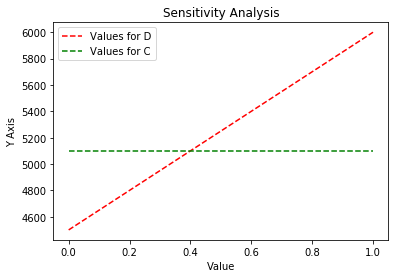

In [13]:
import matplotlib.pyplot as plt            # Import the Python plotting package and give it nickname plt
import numpy as np                         # Import the numerical Python package and give it the name np
X=np.linspace(0,1,11)                      # X = [0, 0.1, 0.2, ..., 1]. Interpolate between 0 and 1 with 11 points.
valuesForD=[]                              # Empty list that will store corresponding values for node D             
valuesForC=[]                              # Empty list that will store corresponding values for node C     

for p in X:                               # Iterate through the list X, and set p to be the value each time.
    a=Node('A',value=6000)                # Code copied and pasted from above, to build the decision tree.
    b=Node('B',value=4500)
    d=Node('D',[a,b],[p,1-p])             # Note the change from above: [.8,.2] changed to [p, 1-p]
    c1=Node('C1',value=5000)
    c2=Node('C2',value=7000)
    c3=Node('C3',value=-2000)
    c=Node('C',[c1,c2,c3],[.5,.4,.1])
    E=Node('E',[d,c])
    valuesForD.append(d.evaluate())       # Evaluate the node d and add the value to the list valuesForD
    valuesForC.append(c.evaluate())       # Evaluate the node c and add the value to the list valuesForC

print('X={}'.format(X))                   # Print the list X
print('valuesForD={}'.format(valuesForD)) # Print the finished lists valuesForD and valuesForC
print('valuesForC={}'.format(valuesForC))
plt.plot(X,valuesForD,'r--',label='Values for D')  # Plot valuesForD against X using red dashed lines
plt.plot(X,valuesForC,'g--',label='Values for C')  # Plot valuesForC against X using green dashed lines
plt.legend()                              # Output the legend
plt.xlabel('Value')                       # X axis label
plt.ylabel('Y Axis')                      # Y axis label
plt.title('Sensitivity Analysis')         # Title
plt.show()                                # Show the plot

As can be seen, as long as probability is above around 40%, then the node D is better than the node C.

# Review of CDF, PDF, PMF

For a review of the cumulative distribution function (CDF), probability density function (PDF) and probability mass function (PMF), please see the last 15 minute of the video recording for class.

The key points are:

- Only discrete random variables have PMFs.
- Only continuous random variables have PDFs.
- All random variables have CDFs.
- How to interpret PMFs and PDFs: They are essentially histograms with many samples and tiny bin sizes. You can interpret them as you would a histogram of values.
- Features of a random variable that can be easily seen on a PMF or PDF: the mean/expected value (center of mass), the amount of variation (whether we see a single spike or a shape that is more spread out), the tails (probability of very high or very low values.)

**Question:** Suppose $X$ is your net worth in 20 years. What of the following distributions would you prefer? (There is no single right answer. It's a matter of personal preference. The point is how to be able to interpret the PDFs.)

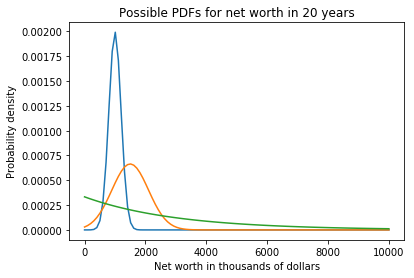

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
values=np.linspace(0,10000,100)
X1=stats.norm(1000,200).pdf(values)
X2=stats.norm(1500,600).pdf(values)
X3=stats.expon(scale=3000).pdf(values)
plt.plot(values,X1,values,X2,values,X3)
plt.xlabel("Net worth in thousands of dollars")
plt.ylabel("Probability density")
plt.title('Possible PDFs for net worth in 20 years')
plt.show()